In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt18 = "Download the PDB for 2YXF. Tell me about its stability, as found in literature. Then, simulate it for 1ns and plot its RMSD over time."
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-10
time: 21:06:54
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [3]:
agent.run(prompt18)

Thought: I need to download the PDB file for 2YXF, find literature on its stability, simulate it for 1ns, and plot its RMSD over time. I will start by downloading the PDB file.

Action: 
```
{
  "action": "PDBFileDownloader",
  "action_input": "2YXF"
}
```

2024-07-10 21:06:57.335 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


PDB file found with this ID: 2YXF
Thought: The next step is to find literature on the stability of the protein 2YXF. I will perform a literature search to gather relevant information.

Action:
```
{
  "action": "LiteratureSearch",
  "action_input": {
    "query": "stability of protein 2YXF"
  }
}
```"2YXF protein stability studies"
Search: "2YXF protein stability studies"


	Scraper openaccess failed on paper titled 'DynaMut2: Assessing changes in stability and flexibility upon single and multiple point missense mutations'.
Traceback (most recent call last):
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/scraper.py", line 82, in scrape
    result = await scraper.function(paper, path, **scraper.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 300, in openaccess_scraper
    await link_to_pdf(url, path, session)
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 133, in link_to_pdf
    r.raise_for_status()
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/aiohttp/client_reqrep.py", line 1070, in raise_for_status
    raise ClientResponseError(
aiohttp.client_exceptions.ClientResponseError: 403, 


Found 15 papers
The next steps are to set up and run a 1ns simulation for the protein 2YXF and then plot its RMSD over time. I will start by setting up and running the simulation.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "2YXF_210657",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "ewaldErrorTolerance": 0.0005,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 500000,
      "record_interval_steps": 5000,
      "record_params": ["step", "potentialEnergy", "temperature"]
   

("The RMSD calculation and plot for the 1ns simulation of protein 2YXF have been successfully completed. Here is a summary of the results:\n\n1. **PDB Download**: The PDB file for 2YXF was successfully downloaded.\n2. **Literature on Stability**: The stability of protein 2YXF can be assessed using tools like PoPMuSiC-2.0, which estimates the effects of mutations on protein stability. Structural analysis through databases such as the Protein Data Bank and computational techniques including NACCESS may aid in understanding 2YXF's structural stability.\n3. **Simulation Setup and Execution**: The simulation was set up and run for 1ns using the cleaned PDB file. The simulation parameters included:\n   - Nonbonded Method: PME\n   - Nonbonded Cutoff: 1 nm\n   - Ewald Error Tolerance: 0.0005\n   - Constraints: HBonds\n   - Rigid Water: True\n   - Constraint Tolerance: 0.00001\n   - Solvate: True\n   - Integrator: LangevinMiddle\n   - Temperature: 300 K\n   - Friction: 1.0 / ps\n   - Timestep: 

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-10
time: 23:33:30
Files found in registry: 2YXF_210657: PDB file downloaded from RSCB
 PDBFile ID: 2YXF_210657
 2YXF_210850: Cleaned File:  Removed Heterogens
 and Water Kept.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_210859: Initial positions for simulation sim0_210859
 sim0_210859: Basic Simulation of Protein 2YXF_210850
 rec0_210901: Simulation trajectory for protein 2YXF_210850 and simulation sim0_210859
 rec1_210901: Simulation state log for protein 2YXF_210850 and simulation sim0_210859
 rec2_210901: Simulation pdb frames for protein 2YXF_210850 and simulation sim0_210859
 rmsd_210859: RMSD for 210859
 fig0_233322: RMSD plot for 210859


In [8]:
print("Agent answer on Stabiltiy: \n**Literature on Stability**: The stability of protein 2YXF can be assessed using tools like PoPMuSiC-2.0, which estimates the effects of mutations on protein stability. Structural analysis through databases such as the\n Protein Data Bank and computational techniques including NACCESS may aid in understanding 2YXF's structural stability.")


Agent answer on Stabiltiy: 2. 
**Literature on Stability**: The stability of protein 2YXF can be assessed using tools like PoPMuSiC-2.0, which estimates the effects of mutations on protein stability. Structural analysis through databases such as the
 Protein Data Bank and computational techniques including NACCESS may aid in understanding 2YXF's structural stability.


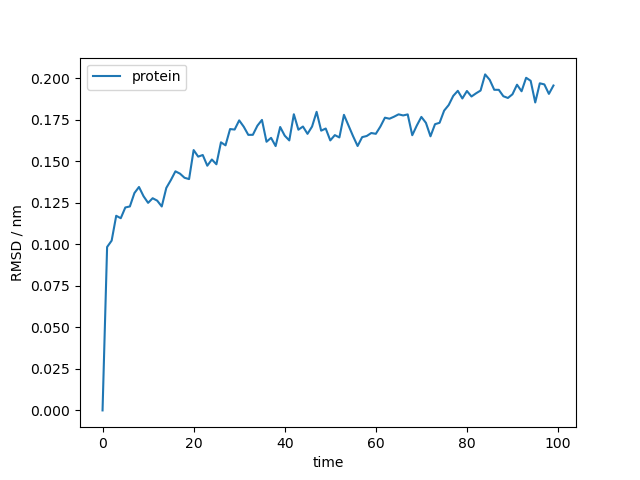

In [9]:
path_rmsd = registry.get_mapped_path("fig0_233322")
from IPython.display import Image
Image(filename=path_rmsd)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅  
### Attempted all necessary steps ✅  
### Logic make sense  ✅  
### Correct Answer  ✅  